In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_US = df[df['job_country'] == 'United States']

In [4]:
df_skills = df_US.explode('job_skills')

In [5]:
df_skills[['job_title', 'job_skills']].head(10)

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,aws
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,tensorflow
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,keras
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,pytorch
5,GCP Data Engineer,python


In [6]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count.head(10)

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
            Machine Learning Engineer      56
            Senior Data Analyst           136
            Senior Data Engineer         1784
            Senior Data Scientist         423
            Software Engineer              87
dtype: int64

In [7]:
type(df_skills_count)

pandas.core.series.Series

In [8]:
df_skills_count = df_skills_count.reset_index(name="skill_count")

In [9]:
type(df_skills_count)

pandas.core.frame.DataFrame

In [10]:
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [11]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [12]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

In [13]:
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

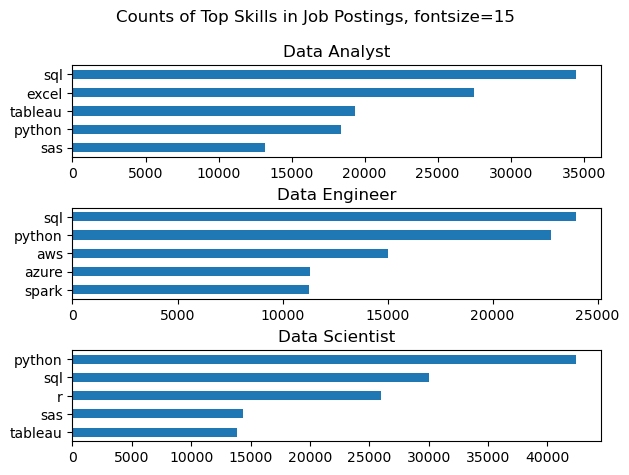

In [14]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle("Counts of Top Skills in Job Postings, fontsize=15")
fig.tight_layout(h_pad=0.5) # Fix the overlap
plt.show()

In [15]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [16]:
pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [17]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total'] 

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


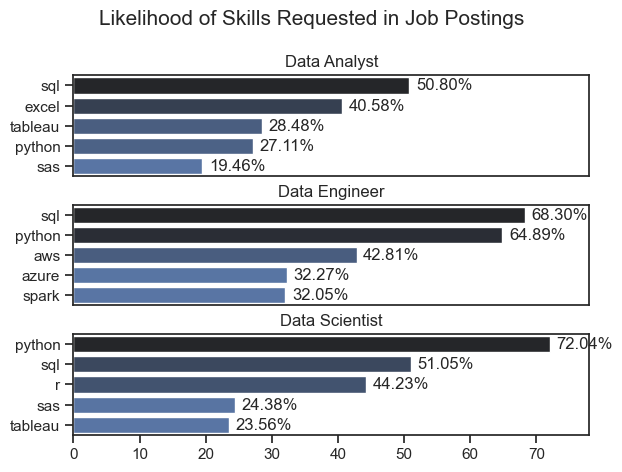

In [31]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    # ax[i].invert_yaxis() -- Not needed in sns
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0, 78)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.2f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
    
    

fig.suptitle("Likelihood of Skills Requested in Job Postings", fontsize=15)
fig.tight_layout(h_pad=0.5) # Fix the overlap
plt.show()